<a href="https://colab.research.google.com/github/ak2000-dotcom/iris_svm/blob/main/SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,log_loss 
from tqdm import tqdm_notebook

from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder

In [2]:
#sigmoid_neuron_with cross_entropy error
class sigmoid_neuron_ce():
  def __init__(self):
    self.w=None
    self.b=None
  
  def sigmoid(self,x):
    return 1/(1+np.exp(-(np.dot(self.w,x.T)+self.b)))

  def error(self,X,Y):
    loss=[]
    for x,y in zip(X,Y):
      y_pred=self.sigmoid(x)
      loss.append(-( (1-y)*(np.log2(1-y_pred)) + y*(np.log2(y_pred)))) 
    return loss  
  
  def grad_w(self,x,y):
    fx=self.sigmoid(x)
    return (fx-y)*x
  
  def grad_b(self,x,y):
    fx =self.sigmoid(x)
    return (fx - y) 
  
  def predict(self,X):
    y_pred=self.sigmoid(X)
    return y_pred
  
  def fit(self,X,Y,epochs=1,lr=1, instance=True , display_loss=False):
    if instance:
      self.w=np.random.randn(X.shape[1])
      self.b=0
    if display_loss:
      loss=[]
    for i in tqdm_notebook(range(epochs), total=epochs, unit='epoch'):#this tqdm operation bascically just added a progress bar!
      db=0
      dw=0
      for x,y in zip(X,Y):
        dw+=self.grad_w(x,y)
        db+=self.grad_b(x,y)
      m=X.shape[0]
      self.w=self.w-lr*dw/m
      self.b=self.b-lr*db/m
      if display_loss:
        y_pred=self.sigmoid(x)
        y_pre=(y_pred>=0.5).astype(np.int)
        loss.append(self.error(X,Y))
    if display_loss:
        plt.plot(loss)
        plt.xlabel('epochs')
        plt.ylabel('error')
        plt.show()
    if display_loss:
      return loss
  def evaluate(self,X,Y):
    y_pred=self.predict(X)
    return accuracy_score(y_pred,Y)
    

In [3]:
#Generating data! Data generated is obv non-linear.
data, labels=make_blobs(n_samples=1000,centers=4,n_features=2,random_state=0)

In [4]:
#labels are just targets
(data.shape,labels.shape)

((1000, 2), (1000,))

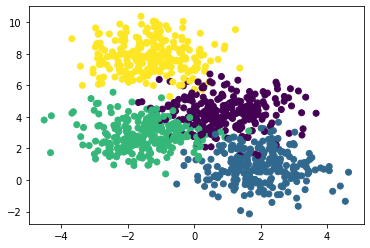

In [5]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap='viridis')
plt.show()

In [6]:
#Converting the data to binary calssification!
lables_orig=labels
labels=np.mod(labels,2)
#here, originally we had 4 labels. But due to mod 2, the original labels[0,1,2,3] converted to[0,1,0,1]-> 2 labesl

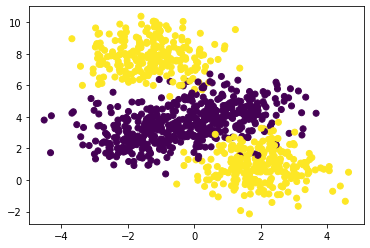

In [7]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap='viridis')
plt.show()

In [8]:
x_train,x_val,y_train,y_val=train_test_split(data,labels,stratify=labels,random_state=0)
print(x_train.shape,x_val.shape)

(750, 2) (250, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


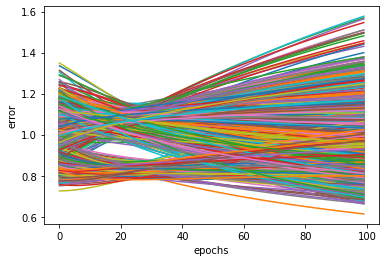

In [9]:
sn=sigmoid_neuron_ce()
loss=sn.fit(x_train,y_train,100,0.015,True,True)

In [10]:
y_pred_train=sn.predict(x_train)
y_pred_train_bin=(y_pred_train>=0.5).astype(np.int).ravel()
y_pred_val=sn.predict(x_val)
y_pred_val_bin=(y_pred_val>=0.5).astype(np.int).ravel()
print(accuracy_score(y_pred_train_bin,y_train))
print(accuracy_score(y_pred_val_bin,y_val))

0.652
0.668


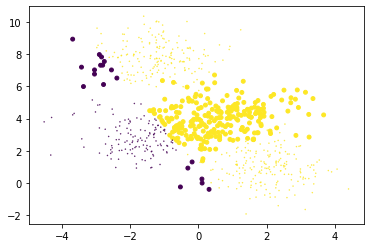

In [11]:
#Task is basically to plot both the corrects and predicted data on the same plane
plt.scatter(x_train[:,0],x_train[:,1],c=y_pred_train_bin,s=(15*np.abs(y_train-y_pred_train_bin) +.2))#the s stands for size, and it only plots the values with different size,which means
#incorrect points